<a href="https://colab.research.google.com/github/aakhterov/ML_tools/blob/master/seaborn_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn.objects as so
sns.set_theme(style="darkgrid")

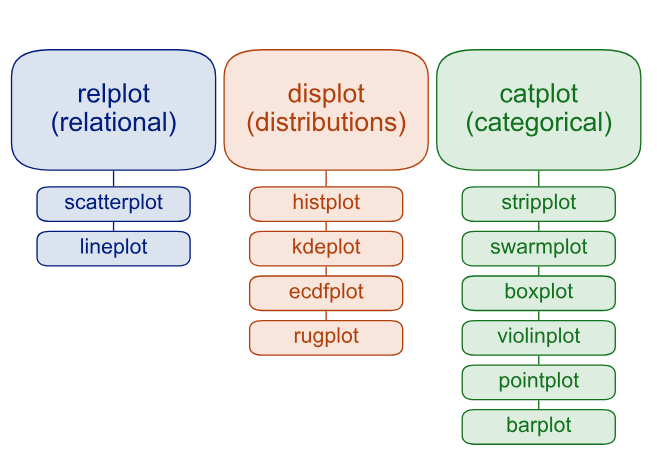
<div style='text-align: center'>Functions organization in seaborn: figure-level and underlaying behind them axes-level functions</div>

<b>Long-form data</b>
<div>
A long-form data table has the following characteristics:
<ul>
    <li>Each variable is a column</li>
    <li>Each observation is a row</li>
</ul>
</div>
<div>
<i>Example</i>
</div>
<div>
<table border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>year</th>
      <th>month</th>
      <th>passengers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1949</td>
      <td>Jan</td>
      <td>112</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1949</td>
      <td>Feb</td>
      <td>118</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1949</td>
      <td>Mar</td>
      <td>132</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1949</td>
      <td>Apr</td>
      <td>129</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1949</td>
      <td>May</td>
      <td>121</td>
    </tr>
  </tbody>
</table>
</div>

<b>Wide-form data</b>
<div>
Data might be viewed in a spreadsheet, where the columns and rows contain levels of different variables.
</div>
<i>Example</i>
<div>
<table border="1">
  <thead>
    <tr style="text-align: right;">
      <th>month</th>
      <th>Jan</th>
      <th>Feb</th>
      <th>Mar</th>
      <th>Apr</th>
      <th>May</th>
      <th>Jun</th>
      <th>Jul</th>
      <th>Aug</th>
      <th>Sep</th>
      <th>Oct</th>
      <th>Nov</th>
      <th>Dec</th>
    </tr>
    <tr>
      <th>year</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1949</th>
      <td>112</td>
      <td>118</td>
      <td>132</td>
      <td>129</td>
      <td>121</td>
      <td>135</td>
      <td>148</td>
      <td>148</td>
      <td>136</td>
      <td>119</td>
      <td>104</td>
      <td>118</td>
    </tr>
    <tr>
      <th>1950</th>
      <td>115</td>
      <td>126</td>
      <td>141</td>
      <td>135</td>
      <td>125</td>
      <td>149</td>
      <td>170</td>
      <td>170</td>
      <td>158</td>
      <td>133</td>
      <td>114</td>
      <td>140</td>
    </tr>
    <tr>
      <th>1951</th>
      <td>145</td>
      <td>150</td>
      <td>178</td>
      <td>163</td>
      <td>172</td>
      <td>178</td>
      <td>199</td>
      <td>199</td>
      <td>184</td>
      <td>162</td>
      <td>146</td>
      <td>166</td>
    </tr>
    <tr>
      <th>1952</th>
      <td>171</td>
      <td>180</td>
      <td>193</td>
      <td>181</td>
      <td>183</td>
      <td>218</td>
      <td>230</td>
      <td>242</td>
      <td>209</td>
      <td>191</td>
      <td>172</td>
      <td>194</td>
    </tr>
    <tr>
      <th>1953</th>
      <td>196</td>
      <td>196</td>
      <td>236</td>
      <td>235</td>
      <td>229</td>
      <td>243</td>
      <td>264</td>
      <td>272</td>
      <td>237</td>
      <td>211</td>
      <td>180</td>
      <td>201</td>
    </tr>
  </tbody>
</table>    
</div>

### Load data

In [ ]:
iris = datasets.load_iris()
data, target, target_names, feature_names = iris["data"], iris["target"], iris["target_names"], iris["feature_names"]

### First look at the data

In [ ]:
print(f"Data shape: {data.shape}. \n \
Data examples: {data[:2]}. \n \
Target shape: {target.shape}. \n \
Target examples: {target[:2]}. \n \
Target names: {target_names}. \n \
Feature names: {feature_names}")

Data shape: (150, 4). 
 Data examples: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]. 
 Target shape: (150,). 
 Target examples: [0 0]. 
 Target names: ['setosa' 'versicolor' 'virginica']. 
 Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Combine ndarrays to pandas dataframe
data_dict = dict({feature_name: data[:,idx] for idx, feature_name in enumerate(feature_names)},
                 **{"target_names": [target_names[target_value] for target_value in target]},
                 **{"target": target})
iris_df = pd.DataFrame(data_dict)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


### Scatter plots

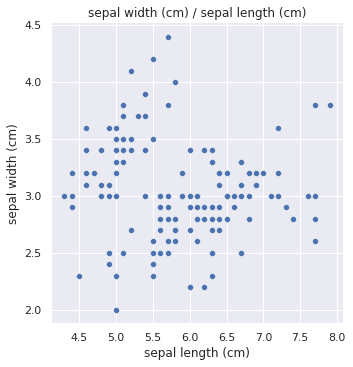

In [ ]:
g = sns.relplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", kind='scatter')
g.set(title='sepal width (cm) / sepal length (cm)')

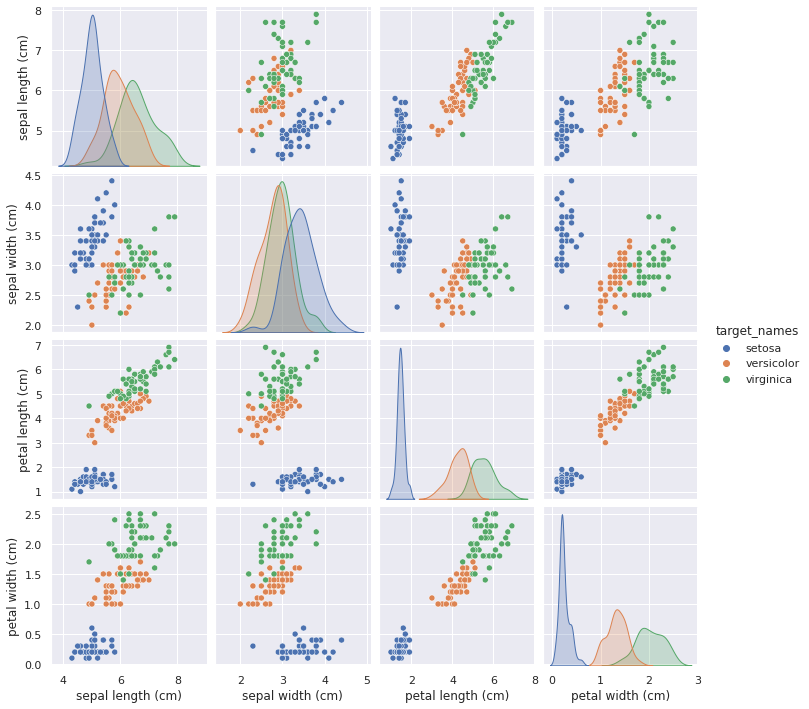

In [ ]:
sns.pairplot(data=iris_df[feature_names + ['target_names']], hue="target_names")

### Hist plots

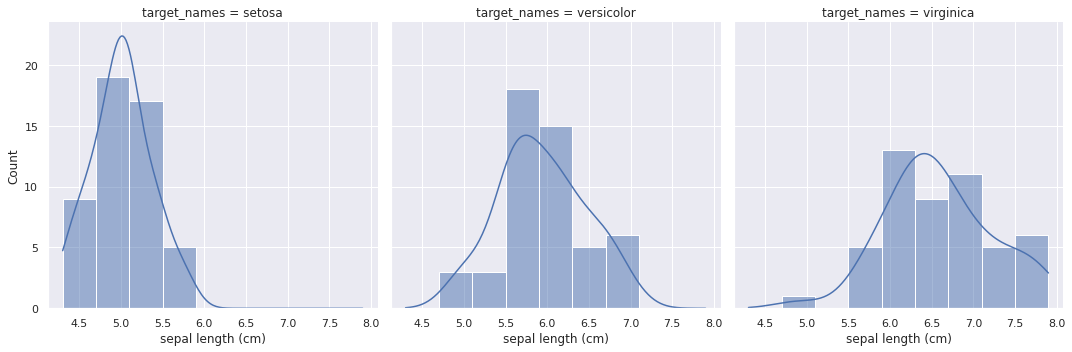

In [ ]:
sns.displot(data=iris_df, x="sepal length (cm)", col="target_names", kde=True)

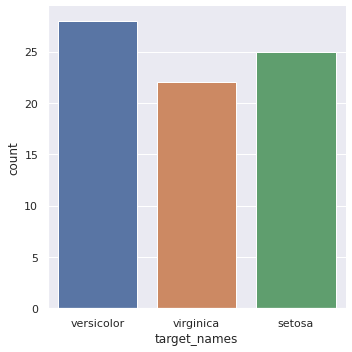

In [ ]:
sns.catplot(data=iris_df.sample(frac=0.5), kind="count", x="target_names")

### With linear regression model

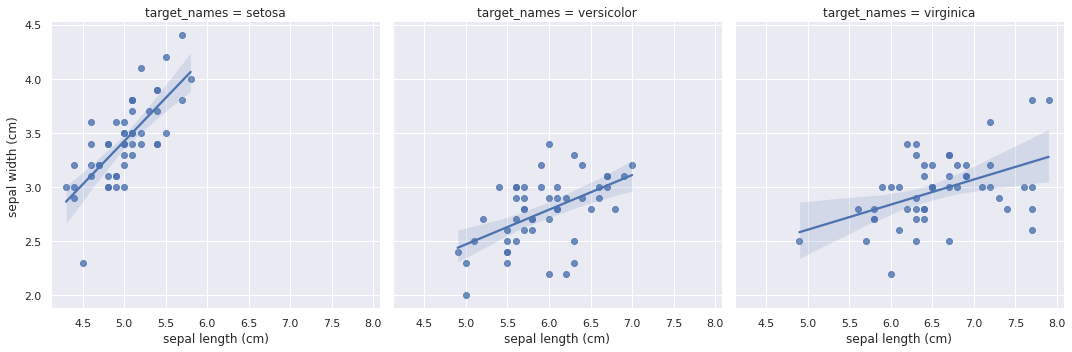

In [ ]:
sns.lmplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", col="target_names")

### Using the seaborn.objects interface

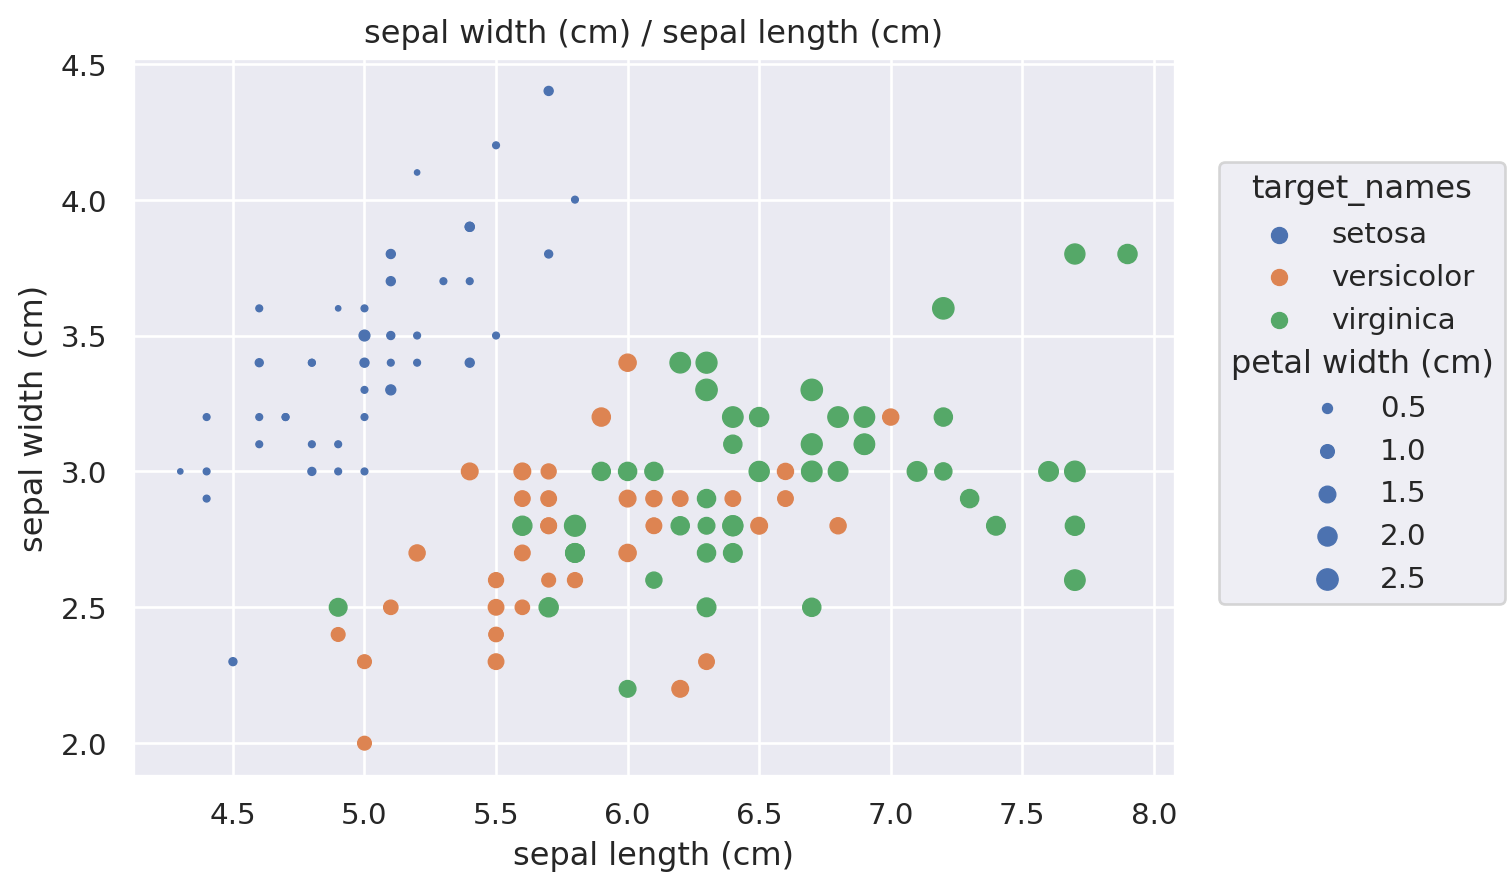

In [ ]:
so.Plot(iris_df, x="sepal length (cm)", y="sepal width (cm)", color="target_names", pointsize="petal width (cm)")\
    .add(so.Dot())\
    .label(title="sepal width (cm) / sepal length (cm)")

In [ ]:
# def log_sigmoid(z):
#     return -np.log(1/(1+np.exp(-z)))

# def log_sigmoid_1(z):
#     return -np.log(1 - 1/(1+np.exp(-z)))

# def hinge_loss(z):
#     return np.maximum(0, 1-z)

In [ ]:
# z = np.linspace(-5, 5, 100)
# sns.lineplot(x=z, y=log_sigmoid(z))
# sns.lineplot(x=z, y=log_sigmoid_1(z))
# sns.lineplot(x=z, y=hinge_loss(z))

### References

<ul>
    <li><a href='https://seaborn.pydata.org/tutorial.html'>https://seaborn.pydata.org/tutorial.html</a></li>
</ul>